**Loading the dataset**

In [ ]:
import pandas as pd
dataset_path = "iris.data"
df = pd.read_csv(dataset_path, names=['sepal_length','sepal_width','petal_length','petal_width','target'])

**Preprocessing**

In [ ]:
from sklearn import preprocessing
#print the number of NaN rows in each feature
res = df.isna().sum()
print("Number of NaN rows per feature:")
print(res)

Number of NaN rows per feature:
sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64


**Drop NaN rows**

In [ ]:
df.dropna(inplace=True)
#this line is necessary to reindex, otherwise we will not be able to create the scatter plot correctly
df.reset_index(drop=True, inplace=True)

In [ ]:
res = df.isna().sum()
print("Number of NaN rows per feature:")
print(res)

Number of NaN rows per feature:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


Encode target labels with value between 0 and n_classes-1.

(This transformer should be used to encode target values, i.e. y, and not the input X.)

In [ ]:
df['target'] = preprocessing.LabelEncoder().fit_transform(df['target'])

**Normalization**

In [ ]:
#get target column of data before normalazing, this is later on used to visualize our data
target_col = df.pop('target')

#print mean and variance before normalization
print("Variance values before normalization: \n")
print(df.var())
print("Mean values before normalization: \n")
print(df.mean())

#data normalization using StandardScaler
normalized = preprocessing.StandardScaler().fit_transform(df)
normalized = pd.DataFrame(normalized, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#print mean and variance after normalization
print("Variance values after normalization: \n")
print(normalized.var())
print("Mean values after normalization: \n")
print(normalized.mean())

Variance values before normalization: 

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64
Mean values before normalization: 

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
Variance values after normalization: 

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
dtype: float64
Mean values after normalization: 

sepal_length   -2.775558e-16
sepal_width    -5.140333e-16
petal_length    1.154632e-16
petal_width     9.251859e-16
dtype: float64


**PCA**

In [ ]:
from sklearn.decomposition import PCA
#reduces diensions fro 4 to 2
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

**Visualization**

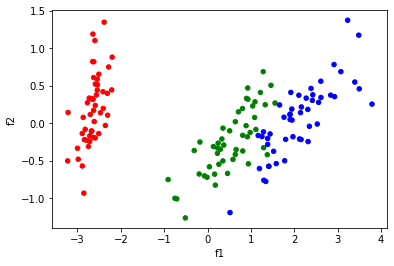

In [222]:
import matplotlib.pyplot as plt
#red -> class 1, green -> class 2, blue -> class 3
#scatter plot
formatter = plt.FuncFormatter(lambda i, *args: pd.DataFrame(pca.transform(df), columns=['f1', 'f2']).target_names[int(i)])
pd.DataFrame(pca.transform(df), columns=['f1', 'f2']).plot.scatter(x = 'f1', y = 'f2', c = target_col.map({0: 'red', 1: 'green', 2: 'blue'}))
plt.show()

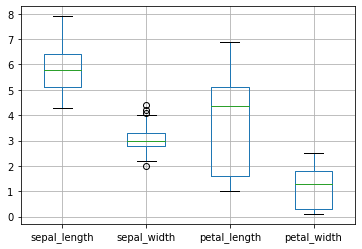

In [223]:
  df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
  plt.show()